### aim: Visualize all GCB outputs, check for holes and compare with last year's

Here is a list of all things requested, first column is variableID (added by TJ to have a clear sequential catalog of the demands)

https://docs.google.com/spreadsheets/d/186mFWSIaPWu7X_RldiGPrPzIuqyNupUR7XwoCBkMaIk/edit#gid=0

Dave's directory, last year's submission: `/gpfs/data/greenocean/GCB/GCB_RECCAP/2022submission`

My directory, this year's submission:
`/gpfs/data/greenocean/GCB/GCB2023/submissionData2023`

In [80]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [81]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [82]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### VarID 1-6 (key flag -1)

(also comparing with TOM12)
(note submission data script adjusted from last year's to have units in pGC/yr)

    1	fgco2_glob
    2	fgco2_reg
    3	intDIC_1994_glob
    4	intDIC_1994_reg
    5	intDIC_2007_glob
    6	intDIC_2007_reg
    


Text(0.5, 1.0, 'north (30 - 90), pG/yr')

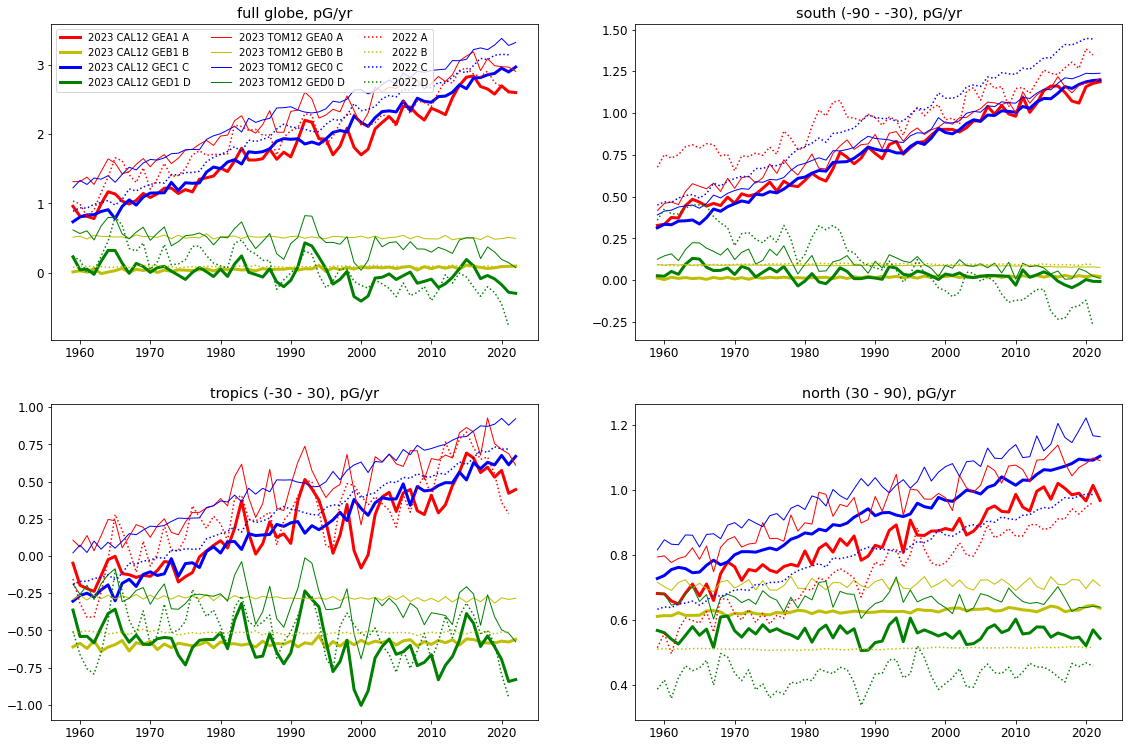

In [83]:
DWdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/GCB2022_inttime/'
TJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/Tier1/'
TOMTJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/TOM12/'


TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_A_*1959-2022_v20230713.nc')[0])
TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_B_*1959-2022_v20230713.nc')[0])
TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_C_*1959-2022_v20230713.nc')[0])
TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdir}/integrated_timelines_PlankTOM_D_*1959-2022_v20230713.nc')[0])

DW_tfil_A = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_A_*1959-2022_v20230713.nc')[0])
DW_tfil_B = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_B_*1959-2022_v20230713.nc')[0])
DW_tfil_C = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_C_*1959-2022_v20230713.nc')[0])
DW_tfil_D = xr.open_dataset(glob.glob(f'{DWdir}/integrated_timelines_PlankTOM_D_*1959-2022_v20230713.nc')[0])

TOMTJ_tfil_A = xr.open_dataset(glob.glob(f'{TOMTJdir}/integrated_timelines_PlankTOM_A_*1959-2022_v20230713.nc')[0])
TOMTJ_tfil_B = xr.open_dataset(glob.glob(f'{TOMTJdir}/integrated_timelines_PlankTOM_B_*1959-2022_v20230713.nc')[0])
TOMTJ_tfil_C = xr.open_dataset(glob.glob(f'{TOMTJdir}/integrated_timelines_PlankTOM_C_*1959-2022_v20230713.nc')[0])
TOMTJ_tfil_D = xr.open_dataset(glob.glob(f'{TOMTJdir}/integrated_timelines_PlankTOM_D_*1959-2022_v20230713.nc')[0])

TJ_tfil_A_yrly = TJ_tfil_A.groupby('TIME.year').mean()
TJ_tfil_B_yrly = TJ_tfil_B.groupby('TIME.year').mean()
TJ_tfil_C_yrly = TJ_tfil_C.groupby('TIME.year').mean()
TJ_tfil_D_yrly = TJ_tfil_D.groupby('TIME.year').mean()

DW_tfil_A_yrly = DW_tfil_A.groupby('TIME.year').mean()
DW_tfil_B_yrly = DW_tfil_B.groupby('TIME.year').mean()
DW_tfil_C_yrly = DW_tfil_C.groupby('TIME.year').mean()
DW_tfil_D_yrly = DW_tfil_D.groupby('TIME.year').mean()

TOMTJ_tfil_A_yrly = TOMTJ_tfil_A.groupby('TIME.year').mean()
TOMTJ_tfil_B_yrly = TOMTJ_tfil_B.groupby('TIME.year').mean()
TOMTJ_tfil_C_yrly = TOMTJ_tfil_C.groupby('TIME.year').mean()
TOMTJ_tfil_D_yrly = TOMTJ_tfil_D.groupby('TIME.year').mean()


fact = 1.6
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_glob, color = 'r', label = '2023 CAL12 GEA1 A', linestyle = '-', linewidth = 3)
axs[0].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_glob, color = 'y', label = '2023 CAL12 GEB1 B', linestyle = '-', linewidth = 3)
axs[0].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_glob, color = 'b', label = '2023 CAL12 GEC1 C', linestyle = '-', linewidth = 3)
axs[0].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_glob, color = 'g', label = '2023 CAL12 GED1 D', linestyle = '-', linewidth = 3)

axs[0].plot(TOMTJ_tfil_A_yrly.year, TOMTJ_tfil_A_yrly.fgco2_glob, color = 'r', label = '2023 TOM12 GEA0 A', linestyle = '-', linewidth = 1)
axs[0].plot(TOMTJ_tfil_B_yrly.year, TOMTJ_tfil_B_yrly.fgco2_glob, color = 'y', label = '2023 TOM12 GEB0 B', linestyle = '-', linewidth = 1)
axs[0].plot(TOMTJ_tfil_C_yrly.year, TOMTJ_tfil_C_yrly.fgco2_glob, color = 'b', label = '2023 TOM12 GEC0 C', linestyle = '-', linewidth = 1)
axs[0].plot(TOMTJ_tfil_D_yrly.year, TOMTJ_tfil_D_yrly.fgco2_glob, color = 'g', label = '2023 TOM12 GED0 D', linestyle = '-', linewidth = 1)

axs[0].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_glob, color = 'r', label = '2022 A', linestyle = ':')
axs[0].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_glob, color = 'y', label = '2022 B', linestyle = ':')
axs[0].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_glob, color = 'b', label = '2022 C', linestyle = ':')
axs[0].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_glob, color = 'g', label = '2022 D', linestyle = ':')
axs[0].legend(ncol = 3, fontsize = 10)

##
axs[1].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2023 CAL12 GEA1 A', linestyle = '-', linewidth = 3)
axs[1].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2023 CAL12 GEB1 B', linestyle = '-', linewidth = 3)
axs[1].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2023 CAL12 GEC1 C', linestyle = '-', linewidth = 3)
axs[1].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2023 CAL12 GED1 D', linestyle = '-', linewidth = 3)

axs[1].plot(TOMTJ_tfil_A_yrly.year, TOMTJ_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2023 TOM12 GEA0 A', linestyle = '-', linewidth = 1)
axs[1].plot(TOMTJ_tfil_B_yrly.year, TOMTJ_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2023 TOM12 GEB0 B', linestyle = '-', linewidth = 1)
axs[1].plot(TOMTJ_tfil_C_yrly.year, TOMTJ_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2023 TOM12 GEC0 C', linestyle = '-', linewidth = 1)
axs[1].plot(TOMTJ_tfil_D_yrly.year, TOMTJ_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2023 TOM12 GED0 D', linestyle = '-', linewidth = 1)

axs[1].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,0], color = 'r', label = '2022 A', linestyle = ':')
axs[1].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,0], color = 'y', label = '2022 B', linestyle = ':')
axs[1].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,0], color = 'b', label = '2022 C', linestyle = ':')
axs[1].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,0], color = 'g', label = '2022 D', linestyle = ':')

###
axs[2].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2023 CAL12 GEA1 A', linestyle = '-', linewidth = 3)
axs[2].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2023 CAL12 GEB1 B', linestyle = '-', linewidth = 3)
axs[2].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2023 CAL12 GEC1 C', linestyle = '-', linewidth = 3)
axs[2].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2023 CAL12 GED1 D', linestyle = '-', linewidth = 3)

axs[2].plot(TOMTJ_tfil_A_yrly.year, TOMTJ_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2023 TOM12 GEA0 A', linestyle = '-', linewidth = 1)
axs[2].plot(TOMTJ_tfil_B_yrly.year, TOMTJ_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2023 TOM12 GEB0 B', linestyle = '-', linewidth = 1)
axs[2].plot(TOMTJ_tfil_C_yrly.year, TOMTJ_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2023 TOM12 GEC0 C', linestyle = '-', linewidth = 1)
axs[2].plot(TOMTJ_tfil_D_yrly.year, TOMTJ_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2023 TOM12 GED0 D', linestyle = '-', linewidth = 1)

axs[2].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,1], color = 'r', label = '2022 A', linestyle = ':')
axs[2].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,1], color = 'y', label = '2022 B', linestyle = ':')
axs[2].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,1], color = 'b', label = '2022 C', linestyle = ':')
axs[2].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,1], color = 'g', label = '2022 D', linestyle = ':')

##
###
axs[3].plot(TJ_tfil_A_yrly.year, TJ_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2023 CAL12 GEA1 A', linestyle = '-', linewidth = 3)
axs[3].plot(TJ_tfil_B_yrly.year, TJ_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2023 CAL12 GEB1 B', linestyle = '-', linewidth = 3)
axs[3].plot(TJ_tfil_C_yrly.year, TJ_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2023 CAL12 GEC1 C', linestyle = '-', linewidth = 3)
axs[3].plot(TJ_tfil_D_yrly.year, TJ_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2023 CAL12 GED1 D', linestyle = '-', linewidth = 3)

axs[3].plot(TOMTJ_tfil_A_yrly.year, TOMTJ_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2023 TOM12 GEA0 A', linestyle = '-', linewidth = 1)
axs[3].plot(TOMTJ_tfil_B_yrly.year, TOMTJ_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2023 TOM12 GEB0 B', linestyle = '-', linewidth = 1)
axs[3].plot(TOMTJ_tfil_C_yrly.year, TOMTJ_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2023 TOM12 GEC0 C', linestyle = '-', linewidth = 1)
axs[3].plot(TOMTJ_tfil_D_yrly.year, TOMTJ_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2023 TOM12 GED0 D', linestyle = '-', linewidth = 1)

axs[3].plot(DW_tfil_A_yrly.year, DW_tfil_A_yrly.fgco2_reg[:,2], color = 'r', label = '2022 A', linestyle = ':')
axs[3].plot(DW_tfil_B_yrly.year, DW_tfil_B_yrly.fgco2_reg[:,2], color = 'y', label = '2022 B', linestyle = ':')
axs[3].plot(DW_tfil_C_yrly.year, DW_tfil_C_yrly.fgco2_reg[:,2], color = 'b', label = '2022 C', linestyle = ':')
axs[3].plot(DW_tfil_D_yrly.year, DW_tfil_D_yrly.fgco2_reg[:,2], color = 'g', label = '2022 D', linestyle = ':')

axs[0].set_title('full globe, pG/yr')
axs[1].set_title('south (-90 - -30), pG/yr')
axs[2].set_title('tropics (-30 - 30), pG/yr')
axs[3].set_title('north (30 - 90), pG/yr')

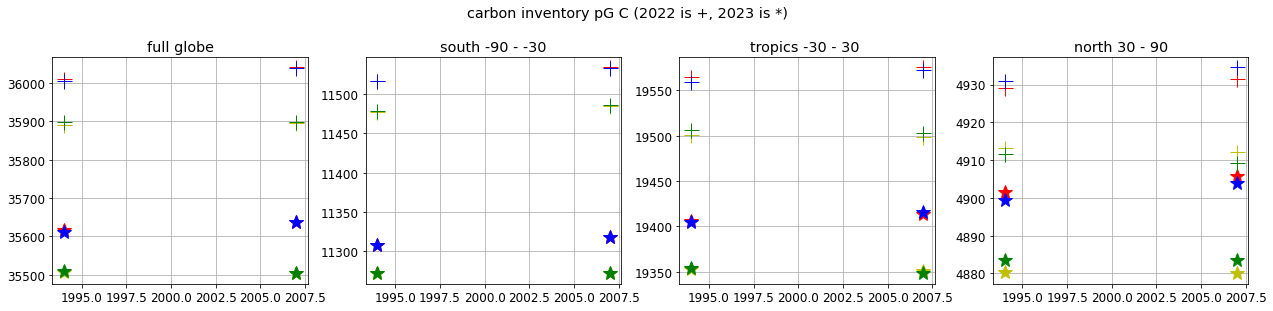

In [84]:
ms = 15
fact = 1.1
fig, axs = plt.subplots(1,4, figsize=(16*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(1994,TJ_tfil_A.intDIC_1994_glob,'r*', markersize = ms, label = '2023 GEA0')
axs[0].plot(1994,TJ_tfil_B.intDIC_1994_glob,'y*', markersize = ms, label = '2023 GEB0')
axs[0].plot(1994,TJ_tfil_C.intDIC_1994_glob,'b*', markersize = ms, label = '2023 GEC0')
axs[0].plot(1994,TJ_tfil_D.intDIC_1994_glob,'g*', markersize = ms, label = '2023 GED0')
axs[0].plot(2007,TJ_tfil_A.intDIC_2007_glob,'r*', markersize = ms)
axs[0].plot(2007,TJ_tfil_B.intDIC_2007_glob,'y*', markersize = ms)
axs[0].plot(2007,TJ_tfil_C.intDIC_2007_glob,'b*', markersize = ms)
axs[0].plot(2007,TJ_tfil_D.intDIC_2007_glob,'g*', markersize = ms)

axs[0].plot(1994,DW_tfil_A.intDIC_1994_glob,'r+', label = '2022 A', markersize = ms)
axs[0].plot(1994,DW_tfil_B.intDIC_1994_glob,'y+', label = '2022 B', markersize = ms)
axs[0].plot(1994,DW_tfil_C.intDIC_1994_glob,'b+', label = '2022 C', markersize = ms)
axs[0].plot(1994,DW_tfil_D.intDIC_1994_glob,'g+', label = '2022 D', markersize = ms)
axs[0].plot(2007,DW_tfil_A.intDIC_2007_glob,'r+', markersize = ms)
axs[0].plot(2007,DW_tfil_B.intDIC_2007_glob,'y+', markersize = ms)
axs[0].plot(2007,DW_tfil_C.intDIC_2007_glob,'b+', markersize = ms)
axs[0].plot(2007,DW_tfil_D.intDIC_2007_glob,'g+', markersize = ms)

axs[1].plot(1994,TJ_tfil_A.intDIC_1994_reg[0],'r*', markersize = ms)
axs[1].plot(1994,TJ_tfil_B.intDIC_1994_reg[0],'y*', markersize = ms)
axs[1].plot(1994,TJ_tfil_C.intDIC_1994_reg[0],'b*', markersize = ms)
axs[1].plot(1994,TJ_tfil_D.intDIC_1994_reg[0],'g*', markersize = ms)
axs[1].plot(2007,TJ_tfil_A.intDIC_2007_reg[0],'r*', markersize = ms)
axs[1].plot(2007,TJ_tfil_B.intDIC_2007_reg[0],'y*', markersize = ms)
axs[1].plot(2007,TJ_tfil_C.intDIC_2007_reg[0],'b*', markersize = ms)
axs[1].plot(2007,TJ_tfil_D.intDIC_2007_reg[0],'g*', markersize = ms)

axs[1].plot(1994,DW_tfil_A.intDIC_1994_reg[0],'r+', markersize = ms)
axs[1].plot(1994,DW_tfil_B.intDIC_1994_reg[0],'y+', markersize = ms)
axs[1].plot(1994,DW_tfil_C.intDIC_1994_reg[0],'b+', markersize = ms)
axs[1].plot(1994,DW_tfil_D.intDIC_1994_reg[0],'g+', markersize = ms)
axs[1].plot(2007,DW_tfil_A.intDIC_2007_reg[0],'r+', markersize = ms)
axs[1].plot(2007,DW_tfil_B.intDIC_2007_reg[0],'y+', markersize = ms)
axs[1].plot(2007,DW_tfil_C.intDIC_2007_reg[0],'b+', markersize = ms)
axs[1].plot(2007,DW_tfil_D.intDIC_2007_reg[0],'g+', markersize = ms)

axs[2].plot(1994,TJ_tfil_A.intDIC_1994_reg[1],'r*', markersize = ms)
axs[2].plot(1994,TJ_tfil_B.intDIC_1994_reg[1],'y*', markersize = ms)
axs[2].plot(1994,TJ_tfil_C.intDIC_1994_reg[1],'b*', markersize = ms)
axs[2].plot(1994,TJ_tfil_D.intDIC_1994_reg[1],'g*', markersize = ms)
axs[2].plot(2007,TJ_tfil_A.intDIC_2007_reg[1],'r*', markersize = ms)
axs[2].plot(2007,TJ_tfil_B.intDIC_2007_reg[1],'y*', markersize = ms)
axs[2].plot(2007,TJ_tfil_C.intDIC_2007_reg[1],'b*', markersize = ms)
axs[2].plot(2007,TJ_tfil_D.intDIC_2007_reg[1],'g*', markersize = ms)

axs[2].plot(1994,DW_tfil_A.intDIC_1994_reg[1],'r+', markersize = ms)
axs[2].plot(1994,DW_tfil_B.intDIC_1994_reg[1],'y+', markersize = ms)
axs[2].plot(1994,DW_tfil_C.intDIC_1994_reg[1],'b+', markersize = ms)
axs[2].plot(1994,DW_tfil_D.intDIC_1994_reg[1],'g+', markersize = ms)
axs[2].plot(2007,DW_tfil_A.intDIC_2007_reg[1],'r+', markersize = ms)
axs[2].plot(2007,DW_tfil_B.intDIC_2007_reg[1],'y+', markersize = ms)
axs[2].plot(2007,DW_tfil_C.intDIC_2007_reg[1],'b+', markersize = ms)
axs[2].plot(2007,DW_tfil_D.intDIC_2007_reg[1],'g+', markersize = ms)

axs[3].plot(1994,TJ_tfil_A.intDIC_1994_reg[2],'r*', markersize = ms)
axs[3].plot(1994,TJ_tfil_B.intDIC_1994_reg[2],'y*', markersize = ms)
axs[3].plot(1994,TJ_tfil_C.intDIC_1994_reg[2],'b*', markersize = ms)
axs[3].plot(1994,TJ_tfil_D.intDIC_1994_reg[2],'g*', markersize = ms)
axs[3].plot(2007,TJ_tfil_A.intDIC_2007_reg[2],'r*', markersize = ms)
axs[3].plot(2007,TJ_tfil_B.intDIC_2007_reg[2],'y*', markersize = ms)
axs[3].plot(2007,TJ_tfil_C.intDIC_2007_reg[2],'b*', markersize = ms)
axs[3].plot(2007,TJ_tfil_D.intDIC_2007_reg[2],'g*', markersize = ms)

axs[3].plot(1994,DW_tfil_A.intDIC_1994_reg[2],'r+', markersize = ms)
axs[3].plot(1994,DW_tfil_B.intDIC_1994_reg[2],'y+', markersize = ms)
axs[3].plot(1994,DW_tfil_C.intDIC_1994_reg[2],'b+', markersize = ms)
axs[3].plot(1994,DW_tfil_D.intDIC_1994_reg[2],'g+', markersize = ms)
axs[3].plot(2007,DW_tfil_A.intDIC_2007_reg[2],'r+', markersize = ms)
axs[3].plot(2007,DW_tfil_B.intDIC_2007_reg[2],'y+', markersize = ms)
axs[3].plot(2007,DW_tfil_C.intDIC_2007_reg[2],'b+', markersize = ms)
axs[3].plot(2007,DW_tfil_D.intDIC_2007_reg[2],'g+', markersize = ms)


tits = ['full globe', 'south -90 - -30', 'tropics -30 - 30 ', 'north 30 - 90']

for i in range(0,4):
    axs[i].grid()
    axs[i].set_title(tits[i])
    
plt.suptitle('carbon inventory pG C (2022 is +, 2023 is *)')
plt.tight_layout()

In [96]:
TJ_tfil_A.fgco2_reg

<xarray.DataArray 'fgco2_reg' (TIME: 768, REGION: 3)>
array([[-1.763558,  0.104768,  1.458258],
       [-1.574416, -0.05956 ,  1.39995 ],
       [-0.771102, -0.176795,  1.46077 ],
       ...,
       [ 2.088461,  0.497552,  0.577624],
       [ 0.882546,  0.364585,  1.037176],
       [-0.784734,  0.547266,  1.699909]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 1959-01-12 1959-02-12 ... 2022-12-11T23:57:52
Dimensions without coordinates: REGION
Attributes:
    units:              PgC/yr
    region attributes:  0 = South, 1 = Tropics, 2 = North

In [85]:
DWdir = '/gpfs/data/greenocean/GCB/GCB_RECCAP/2022submission'
TJdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/Tier1/'
TJdirTOM12 = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/TOM12/'

In [86]:
def plot_2007(fig, axs, i, tfil,ttit,tvmin,tvmax,tcmap = 'Spectral', checkamts = False):
    tdat = np.nanmean(tfil[tvar][576:576+12,:,:].values, axis = 0)
    if checkamts:
        print(np.nanmax(tdat))
        print(np.nanmin(tdat))
    tun =(tfil[tvar].units)
    w = axs[i].pcolormesh(tdat, cmap = tcmap, vmin = tvmin, vmax= tvmax)
    axs[i].set_title(ttit)
    plt.colorbar(w, ax = axs[i], label = tun)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

def checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam = True ):
    TJ_tfil_A = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_A_1_gr_1959-2022_*')[0])
    TJ_tfil_B = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_B_1_gr_1959-2022_*')[0])
    TJ_tfil_C = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_C_1_gr_1959-2022_*')[0])
    TJ_tfil_D = xr.open_dataset(glob.glob(f'{TJdir}/{tvar}_PlankTOM_D_1_gr_1959-2022_*')[0])

    DW_tfil_A = xr.open_dataset(glob.glob(f'{DWdir}/PlankTOM_Sim_2022_A_{tvar}.nc')[0])
    DW_tfil_B = xr.open_dataset(glob.glob(f'{DWdir}/PlankTOM_Sim_2022_B_{tvar}.nc')[0])
    DW_tfil_C = xr.open_dataset(glob.glob(f'{DWdir}/PlankTOM_Sim_2022_C_{tvar}.nc')[0])
    DW_tfil_D = xr.open_dataset(glob.glob(f'{DWdir}/PlankTOM_Sim_2022_D_{tvar}.nc')[0])

    #year 2007
    tsuptit = f'{tvar}, year 2007'
    fact = 1.1
    fig, axs = plt.subplots(2,4, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    fils = [DW_tfil_A, DW_tfil_B, DW_tfil_C, DW_tfil_D, TJ_tfil_A, TJ_tfil_B, TJ_tfil_C, TJ_tfil_D, ]
    tits = ['GCB 2022, A','GCB 2022, B', 'GCB 2022, C', 'GCB 2022, D',\
           '2023 GEA0','2023 GEB0','2023 GEC0','2023 GED0']

    for i in range(0,8):
        plot_2007(fig, axs, i, fils[i],tits[i],tvmin,tvmax,tcmap = tcmap, checkamts = checkam)

    plt.suptitle(tsuptit)

### VarID 7 (key flag 0): fgco2

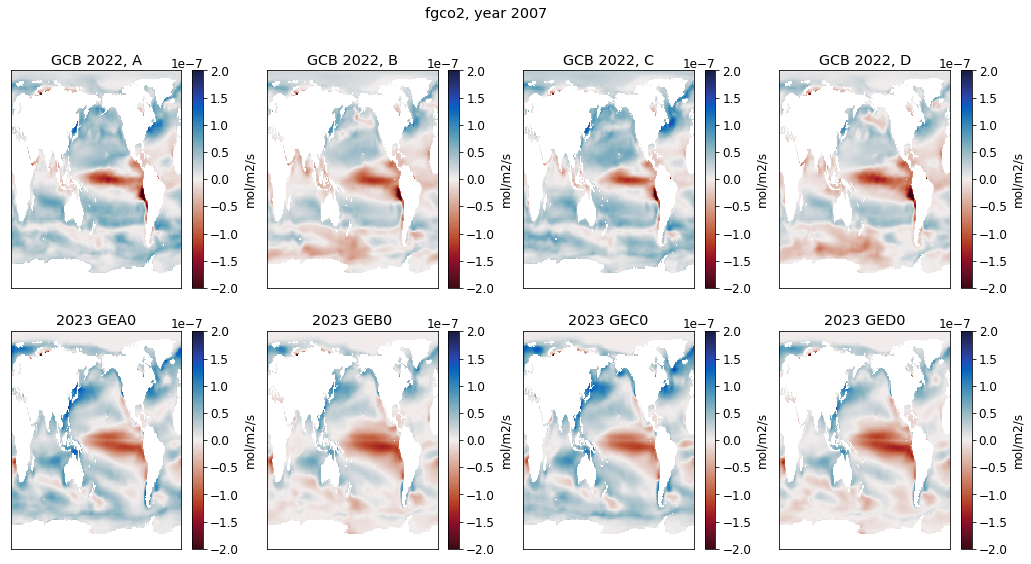

In [87]:
tvar = 'fgco2'
tcmap = cm.balance_r
tvmin = -2e-7; tvmax = 2e-7
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, False)

### VarID 8 (key flag 23): sfco2

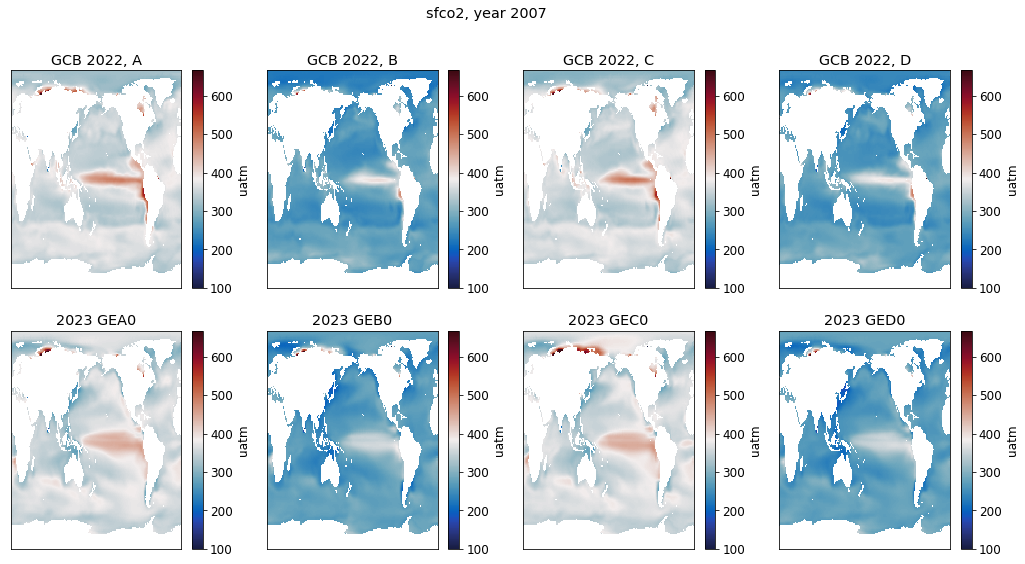

In [88]:
tvar = 'sfco2'
tcmap = cm.balance
tvmin = 0+100; tvmax = 382.99+382.99-100
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 9 (key flag 2): fice

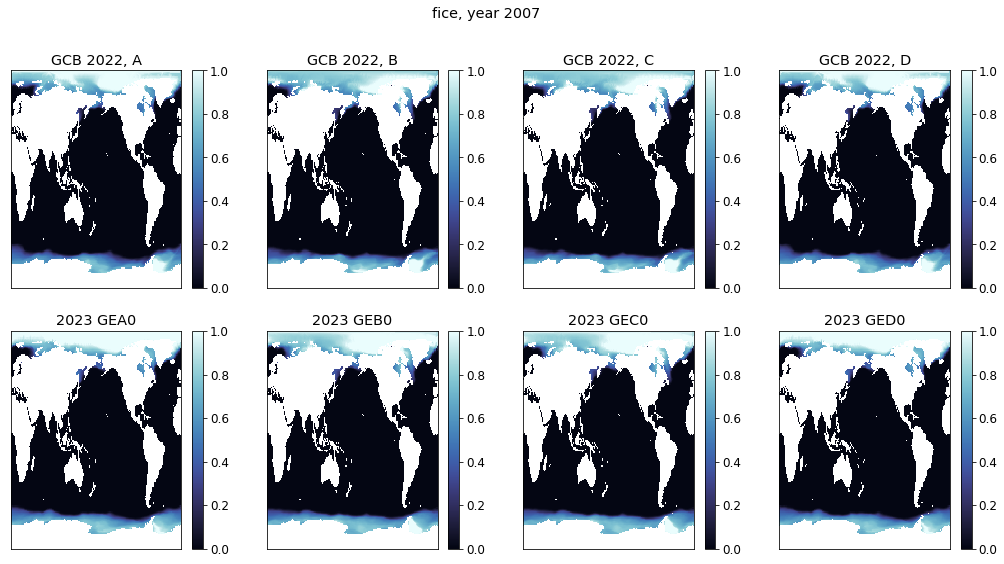

In [89]:
tvar = 'fice'
tcmap = cm.ice
tvmin = 0; tvmax = 1
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 10 (key flag 10): dissicos

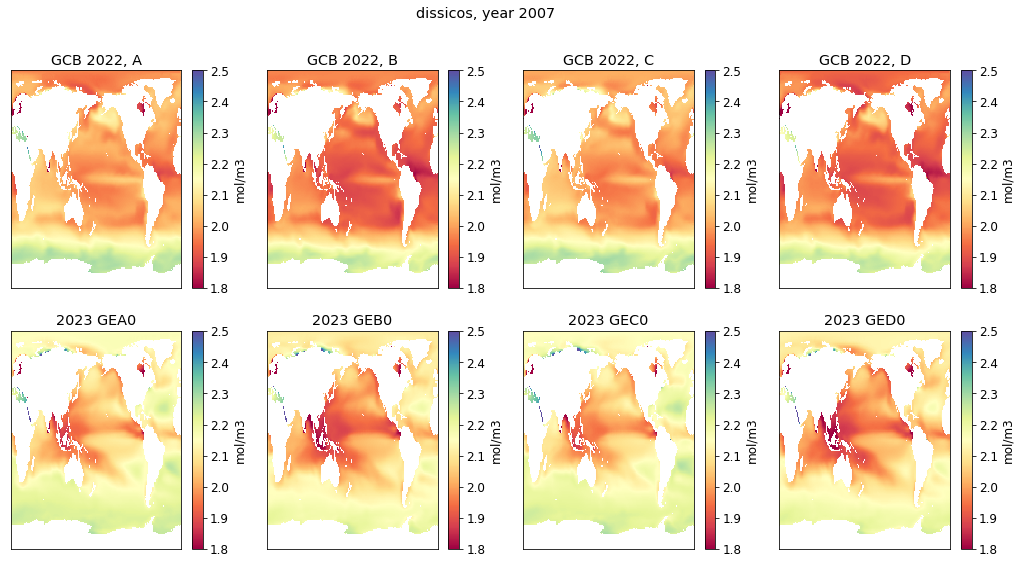

In [90]:
tvar = 'dissicos'
tcmap = 'Spectral'
tvmin = 1.8; tvmax = 2.5
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 11 (key flag 11): talkos

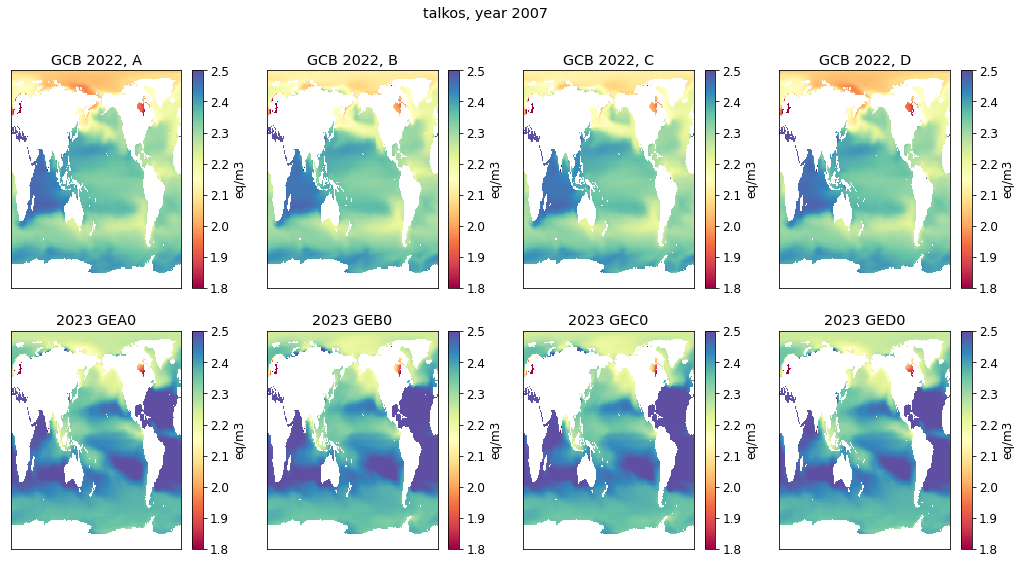

In [91]:
tvar = 'talkos'
tcmap = 'Spectral'
tvmin = 1.8; tvmax = 2.5
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 12 (key flag 8): tos

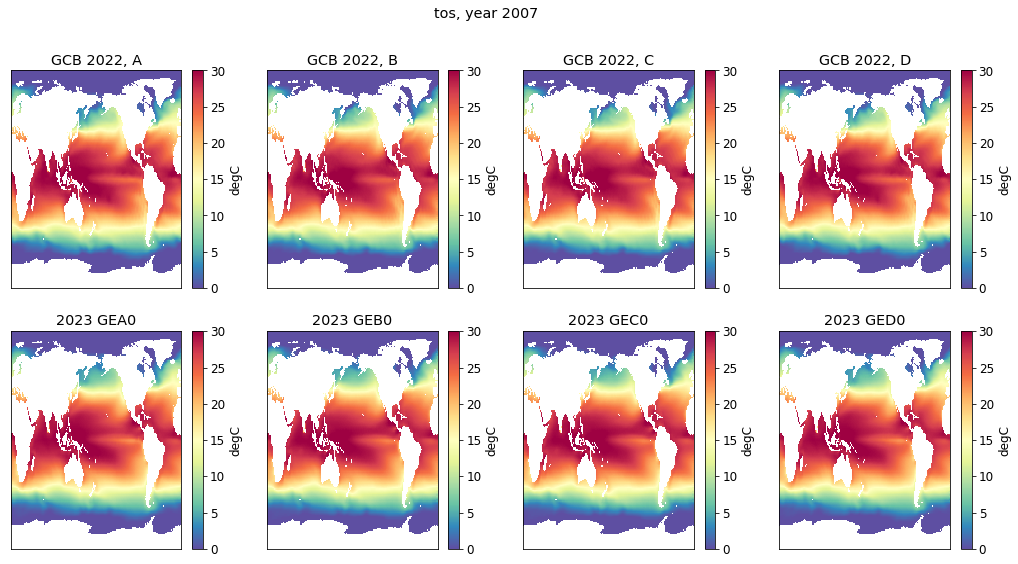

In [92]:
tvar = 'tos'
tcmap = 'Spectral_r'
tvmin = 0; tvmax =30
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 13 (key flag 9): sos

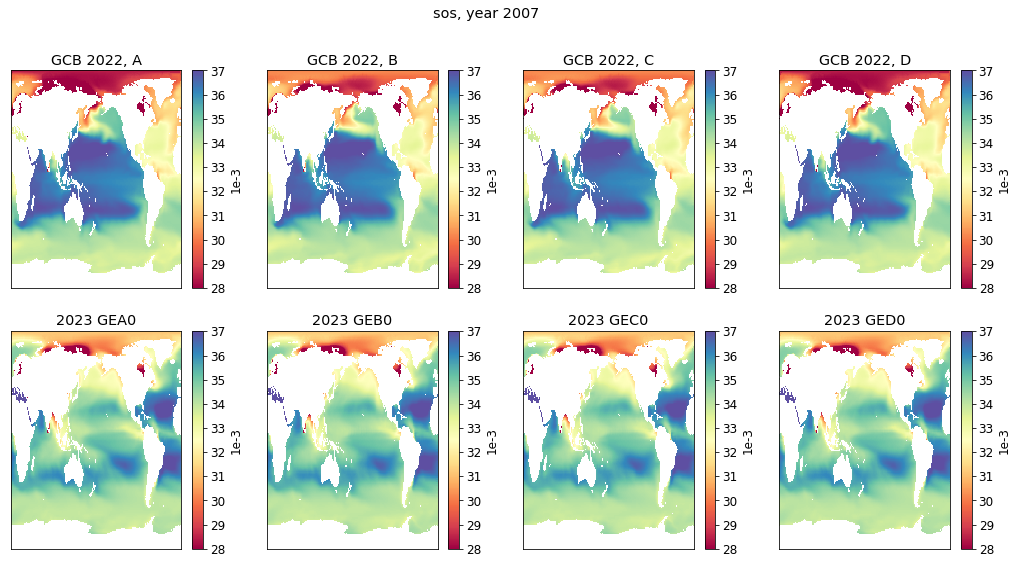

In [93]:
tvar = 'sos'
tcmap = 'Spectral'
tvmin = 28; tvmax = 37
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)

### VarID 14 (key flag 24): intdic 

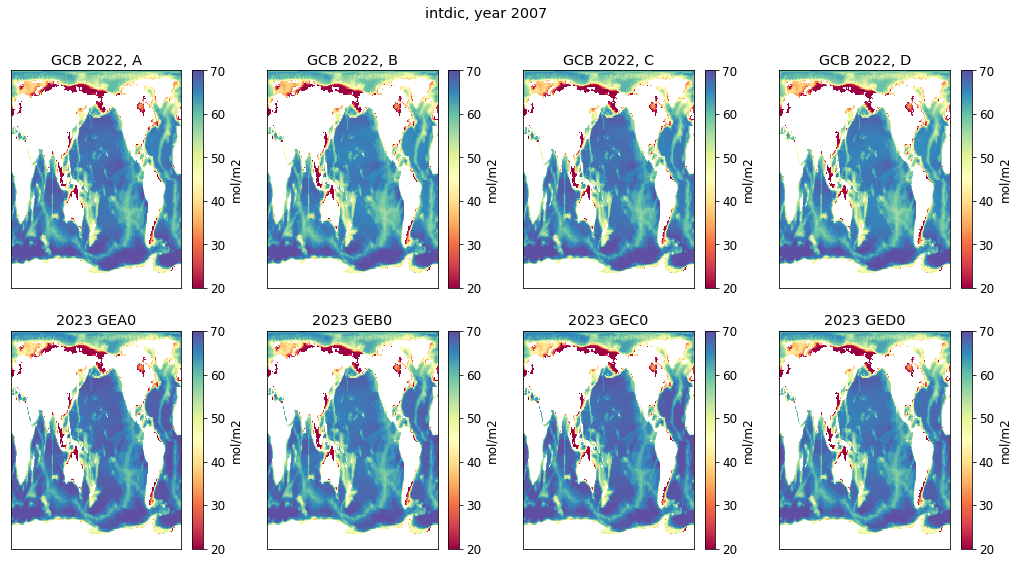

In [94]:
tvar = 'intdic'
tcmap = 'Spectral'
tvmin = 20; tvmax = 70
checkam = False

checkvis_2007(tvar, tcmap, tvmin, tvmax, checkam)